<img style="float: right; margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQt6eQo8JPYzYO4p6WmxLtccdtJ4X8WR6GzVVKbsMjyGvUDEn1mg" width="300px" height="100px" />

# Trabajando con opciones

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento.

Una opción compleja popular son las llamadas **opciones asiáticas** cuyos pagos dependen de todas las trayectorias del precio de los activos subyacentes. Las opciones cuyos pagos dependen de las trayectorias de los precios de los activos subyacentes se denominan opciones dependientes de la ruta.

Principalmente, se puede resumir que las dos razones con más peso de importancia para utilizar opciones son el **aseguramiento** y la **especulación**.

## Opciones Plan Vainilla: opción de compra y opción de venta europea

Una opción vainilla o estándar es una opción normal de compra o venta que no tiene características especiales o inusuales. Puede ser para tamaños y vencimientos estandarizados, y negociarse en un intercambio.
En comparación con otras estructuras de opciones, las opciones de vanilla no son sofisticadas o complicadas.


## 1. ¿Cómo descargar datos de opciones?

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like# hack para que jale pd data reader
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Usando el paquete `pandas_datareader` también podemos descargar datos de opciones. Por ejemplo, descarguemos los datos de las opciones cuyo activo subyacente son las acciones de Apple

In [2]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl
# closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2019-01-18,2.5,call,AAPL190118C00002500,...,2018-11-02 20:00:02,2018-10-15 19:47:03,"{'contractSymbol': 'AAPL190118C00002500', 'str..."
2019-04-18,2.5,call,AAPL190418C00002500,...,2018-11-02 20:00:02,2018-09-22 03:52:17,"{'contractSymbol': 'AAPL190418C00002500', 'str..."
2019-01-18,5.0,call,AAPL190118C00005000,...,2018-11-02 20:00:02,2018-09-08 03:58:48,"{'contractSymbol': 'AAPL190118C00005000', 'str..."
2019-01-18,7.5,put,AAPL190118P00007500,...,2018-11-02 20:00:02,2018-09-22 03:52:38,"{'contractSymbol': 'AAPL190118P00007500', 'str..."
2019-01-18,10.0,call,AAPL190118C00010000,...,2018-11-02 20:00:02,2018-10-30 19:29:06,"{'contractSymbol': 'AAPL190118C00010000', 'str..."
...,...,...,...,...,...,...,...
2019-04-18,410.0,call,AAPL190418C00410000,...,2018-11-02 20:00:02,2018-10-18 15:46:39,"{'contractSymbol': 'AAPL190418C00410000', 'str..."
2019-04-18,420.0,call,AAPL190418C00420000,...,2018-11-02 20:00:02,2018-10-26 14:59:37,"{'contractSymbol': 'AAPL190418C00420000', 'str..."
2019-04-18,420.0,put,AAPL190418P00420000,...,2018-11-02 20:00:02,2018-11-02 14:23:03,"{'contractSymbol': 'AAPL190418P00420000', 'str..."


In [3]:
# aapl_opt.loc[0, 'JSON']
aapl_opt.loc[200, 'JSON']

{'contractSymbol': 'AAPL200117C00140000',
 'strike': 140.0,
 'currency': 'USD',
 'lastPrice': 71.65,
 'change': -12.349998,
 'percentChange': -14.702379,
 'volume': 26,
 'openInterest': 5240,
 'bid': 70.0,
 'ask': 72.35,
 'contractSize': 'REGULAR',
 'expiration': 1579219200,
 'lastTradeDate': 1541188429,
 'impliedVolatility': 0.34348190704345705,
 'inTheMoney': True}

Una vez tenemos la información, podemos consultar de qué tipo son las opciones

In [4]:
aapl_opt.loc[:, 'Type']

0      call
1      call
2      call
3       put
4      call
       ... 
877    call
878    call
879     put
880    call
881     put
Name: Type, Length: 882, dtype: object

o en que fecha expiran

In [5]:
aapl_opt.loc[:, 'Expiry']

0     2019-01-18
1     2019-04-18
2     2019-01-18
3     2019-01-18
4     2019-01-18
         ...    
877   2019-04-18
878   2019-04-18
879   2019-04-18
880   2019-04-18
881   2019-04-18
Name: Expiry, Length: 882, dtype: datetime64[ns]

Por otra parte, podríamos querer consultar todas las opciones de compra (call) que expiran en cierta fecha (2019-04-18)

In [6]:
call06 = aapl_opt.loc[(aapl_opt.Expiry=='2019-04-18') & (aapl_opt.Type=='call')]
call06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,2.5,2019-04-18,call,...,2018-11-02 20:00:02,2018-09-22 03:52:17,"{'contractSymbol': 'AAPL190418C00002500', 'str..."
22,60.0,2019-04-18,call,...,2018-11-02 20:00:02,2018-09-01 03:55:05,"{'contractSymbol': 'AAPL190418C00060000', 'str..."
26,65.0,2019-04-18,call,...,2018-11-02 20:00:02,2018-09-01 03:55:05,"{'contractSymbol': 'AAPL190418C00065000', 'str..."
64,95.0,2019-04-18,call,...,2018-11-02 20:00:02,2018-10-13 03:48:47,"{'contractSymbol': 'AAPL190418C00095000', 'str..."
79,100.0,2019-04-18,call,...,2018-11-02 20:00:02,2018-10-08 15:25:47,"{'contractSymbol': 'AAPL190418C00100000', 'str..."
...,...,...,...,...,...,...,...
875,400.0,2019-04-18,call,...,2018-11-02 20:00:02,2018-11-02 19:56:28,"{'contractSymbol': 'AAPL190418C00400000', 'str..."
876,405.0,2019-04-18,call,...,2018-11-02 20:00:02,2018-10-05 15:02:57,"{'contractSymbol': 'AAPL190418C00405000', 'str..."
877,410.0,2019-04-18,call,...,2018-11-02 20:00:02,2018-10-18 15:46:39,"{'contractSymbol': 'AAPL190418C00410000', 'str..."
878,420.0,2019-04-18,call,...,2018-11-02 20:00:02,2018-10-26 14:59:37,"{'contractSymbol': 'AAPL190418C00420000', 'str..."


## 2. ¿Qué es la volatilidad implícita?

**Volatilidad:** desviación estándar de los rendimientos.
- ¿Cómo se calcula?
- ¿Para qué calcular la volatilidad?

- **Para valuar derivados**, por ejemplo **opciones**.
- Método de valuación de riesgo neutral (se supone que el precio del activo $S_t$ no se ve afectado por el riesgo de mercado).

Recorderis de cuantitativas:
1. Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$
2. Solución de la ecuación

El valor de una opción Europea de vainilla $V_t$ puede obtenerse por:
$$V_t = F(t,S_t)$$ donde
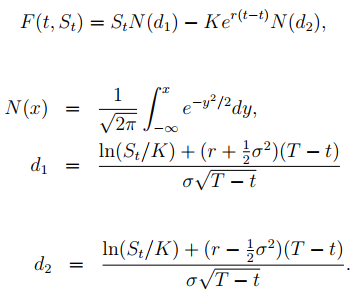
3. Opción de compra europea, suponiendo que los precios del activo son lognormales
4. Opción de venta europea, suponiendo que los precios del activo son lognormales

Entonces, ¿qué es la **volatilidad implícita**?

La volatilidad es una medida de la incertidumbre sobre el comportamiento futuro de un activo, que se mide habitualmente como la desviación típica de la rentabilidad de dicho activo. 

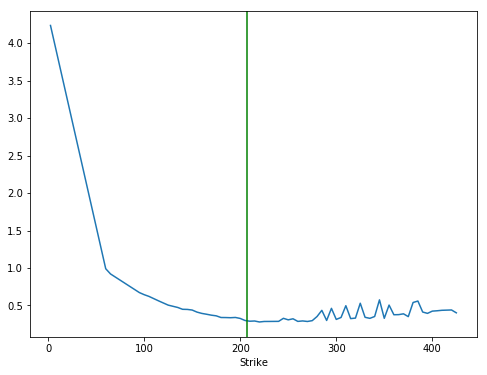

In [7]:
ax = call06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06.Underlying_Price.iloc[0], color='g');
#call06.Underlying_Price

In [8]:
put06 = aapl_opt.loc[(aapl_opt.Expiry=='2019-04-18') & (aapl_opt.Type=='put')]
put06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
14,50.0,2019-04-18,put,...,2018-11-02 20:00:02,2018-08-25 03:51:03,"{'contractSymbol': 'AAPL190418P00050000', 'str..."
18,55.0,2019-04-18,put,...,2018-11-02 20:00:02,2018-08-25 03:51:03,"{'contractSymbol': 'AAPL190418P00055000', 'str..."
27,65.0,2019-04-18,put,...,2018-11-02 20:00:02,2018-09-01 03:55:35,"{'contractSymbol': 'AAPL190418P00065000', 'str..."
32,70.0,2019-04-18,put,...,2018-11-02 20:00:02,2018-09-22 03:52:53,"{'contractSymbol': 'AAPL190418P00070000', 'str..."
41,80.0,2019-04-18,put,...,2018-11-02 20:00:02,2018-09-29 03:56:14,"{'contractSymbol': 'AAPL190418P00080000', 'str..."
...,...,...,...,...,...,...,...
824,325.0,2019-04-18,put,...,2018-11-02 20:00:02,2018-09-08 03:44:29,"{'contractSymbol': 'AAPL190418P00325000', 'str..."
828,330.0,2019-04-18,put,...,2018-11-02 20:00:02,2018-09-08 03:44:29,"{'contractSymbol': 'AAPL190418P00330000', 'str..."
851,350.0,2019-04-18,put,...,2018-11-02 20:00:02,2018-09-15 03:48:34,"{'contractSymbol': 'AAPL190418P00350000', 'str..."
879,420.0,2019-04-18,put,...,2018-11-02 20:00:02,2018-11-02 14:23:03,"{'contractSymbol': 'AAPL190418P00420000', 'str..."


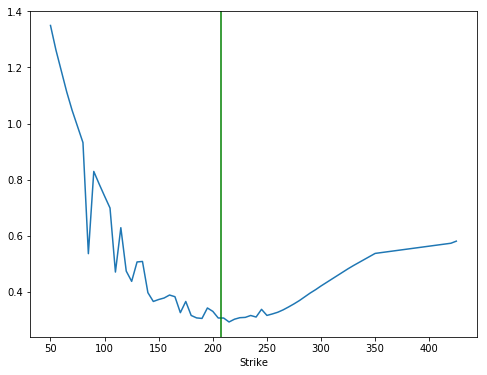

In [9]:
ax = put06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06.Underlying_Price.iloc[0], color='g')

Con lo que hemos aprendido, deberíamos ser capaces de crear una función que nos devuelva un `DataFrame` de `pandas` con los precios de cierre ajustados de ciertas compañías en ciertas fechas:
- Escribir la función a continuación

In [10]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_historical_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

- Obtener como ejemplo los precios de cierre de Apple del año pasado hasta la fecha. Graficar...

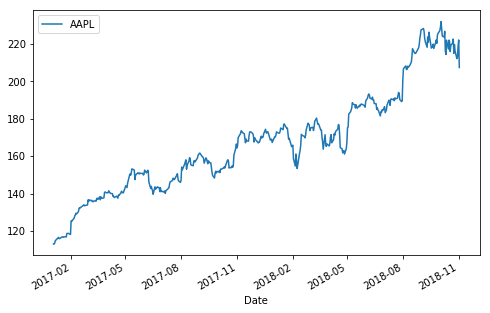

In [12]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_historical_closes(ticker, start_date,freq='d')
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

- Escribir una función que pasándole el histórico de precios devuelva los rendimientos logarítmicos:

In [13]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

- Graficar...

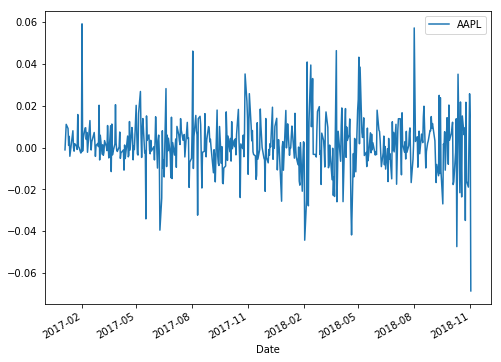

In [14]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

También, descargar datos de opciones de Apple:

In [15]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2018-11-09,185.0,put,AAPL181109P00185000,...,2018-11-02 20:00:02,2018-11-02 19:59:59,"{'contractSymbol': 'AAPL181109P00185000', 'str..."
2018-11-09,225.0,put,AAPL181109P00225000,...,2018-11-02 20:00:02,2018-11-02 19:57:53,"{'contractSymbol': 'AAPL181109P00225000', 'str..."
2018-11-09,187.5,put,AAPL181109P00187500,...,2018-11-02 20:00:02,2018-11-02 19:59:46,"{'contractSymbol': 'AAPL181109P00187500', 'str..."
2018-11-09,242.5,put,AAPL181109P00242500,...,2018-11-02 20:00:02,2018-11-02 13:51:11,"{'contractSymbol': 'AAPL181109P00242500', 'str..."
2018-11-09,190.0,put,AAPL181109P00190000,...,2018-11-02 20:00:02,2018-11-02 19:59:59,"{'contractSymbol': 'AAPL181109P00190000', 'str..."
...,...,...,...,...,...,...,...
2021-01-15,260.0,put,AAPL210115P00260000,...,2018-11-02 20:00:02,2018-10-30 13:46:04,"{'contractSymbol': 'AAPL210115P00260000', 'str..."
2021-01-15,135.0,put,AAPL210115P00135000,...,2018-11-02 20:00:02,2018-10-26 14:33:17,"{'contractSymbol': 'AAPL210115P00135000', 'str..."
2021-01-15,135.0,call,AAPL210115C00135000,...,2018-11-02 20:00:02,2018-11-02 19:14:40,"{'contractSymbol': 'AAPL210115C00135000', 'str..."


In [16]:
aapl_opt.loc[(aapl_opt.Type=='call') & (aapl_opt.Strike==220) & (aapl_opt.Expiry=='2019-02-15')]
#quiero caluar una opcion put en 220 USD PARA EL 15 DE FEBRERO DE 2019, LAS ACCIONES DE APPLE CUESTAN 207 USD01-11-2018

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
517,220.0,2019-02-15,call,...,2018-11-02 20:00:02,2018-11-02 19:59:59,"{'contractSymbol': 'AAPL190215C00220000', 'str..."


In [17]:
opcion_valuar = aapl_opt.loc[536]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL190118C00225000',
 'strike': 225.0,
 'currency': 'USD',
 'lastPrice': 3.8,
 'change': -6.91,
 'percentChange': -64.519135,
 'volume': 6441,
 'openInterest': 23183,
 'bid': 3.6,
 'ask': 4.3,
 'contractSize': 'REGULAR',
 'expiration': 1547769600,
 'lastTradeDate': 1541188799,
 'impliedVolatility': 0.2788158056640625,
 'inTheMoney': False}

# Simulación de precios usando rendimiento simple y logarítmico 

* Comenzaremos por suponer que los rendimientos son un p.e. estacionario que distribuyen $\mathcal{N}(\mu,\sigma)$.

In [18]:
# Descargamos los precios de apple
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_historical_closes(ticker, start_date,freq='d')
closes_aapl

,AAPL
Date,
2017-01-03,113.014
2017-01-04,112.887
2017-01-05,113.462
2017-01-06,114.726
2017-01-09,115.777
...,...
2018-10-29,212.240
2018-10-30,213.300
2018-10-31,218.860


- **Rendimiento Simple**

In [19]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2018-10-29,-0.019
2018-10-30,0.005
2018-10-31,0.026


In [20]:
ndays = 109
nscen = 10
dates = pd.date_range('2018-10-29', periods = ndays)
dates

DatetimeIndex(['2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05',
               '2018-11-06', '2018-11-07',
               ...
               '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
               '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14'],
              dtype='datetime64[ns]', length=109, freq='D')

In [21]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,7,8,9
2018-10-29,-9.017e-03,-9.506e-03,1.000e-02,...,1.835e-02,8.718e-03,-1.212e-02
2018-10-30,-4.211e-05,-2.855e-05,-2.710e-04,...,-2.010e-06,-2.079e-04,-1.155e-04
2018-10-31,2.712e-07,-3.549e-07,1.373e-06,...,2.632e-08,1.143e-06,-1.197e-07
2018-11-01,2.907e-09,2.193e-09,1.140e-08,...,3.301e-10,2.207e-08,-1.679e-09
2018-11-02,5.096e-11,1.120e-11,2.099e-10,...,2.411e-12,7.796e-10,3.912e-11
...,...,...,...,...,...,...,...
2019-02-10,-4.403e-232,-1.842e-225,-6.025e-232,...,-8.891e-230,-6.862e-229,-5.508e-223
2019-02-11,-3.486e-234,4.236e-228,-4.421e-234,...,-1.896e-231,-1.089e-230,1.465e-225
2019-02-12,3.404e-236,3.774e-230,-2.007e-236,...,-2.388e-233,-2.909e-233,-1.135e-228
2019-02-13,-2.709e-238,-4.883e-233,-3.460e-238,...,3.218e-235,4.195e-235,2.184e-230


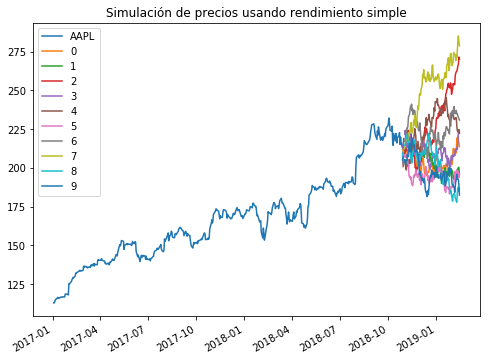

In [22]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

- **Rendimiento logarítmico**

,0,1,2,...,7,8,9
2018-10-29,0.008,0.007,0.011,...,-0.011,0.013,2.381e-04
2018-10-30,0.026,0.025,-0.054,...,0.008,-0.034,1.215e-02
2018-10-31,0.038,0.032,-0.039,...,0.005,-0.020,3.110e-02
2018-11-01,0.048,0.045,-0.026,...,0.011,-0.034,3.384e-02
2018-11-02,0.041,0.063,-0.037,...,0.027,-0.137,-1.097e-02
...,...,...,...,...,...,...,...
2019-02-10,0.410,0.176,0.483,...,0.087,-0.250,-8.618e-02
2019-02-11,0.429,0.192,0.506,...,0.058,-0.257,-6.982e-02
2019-02-12,0.431,0.207,0.531,...,0.067,-0.240,-5.256e-02
2019-02-13,0.438,0.224,0.531,...,0.061,-0.243,-7.445e-02


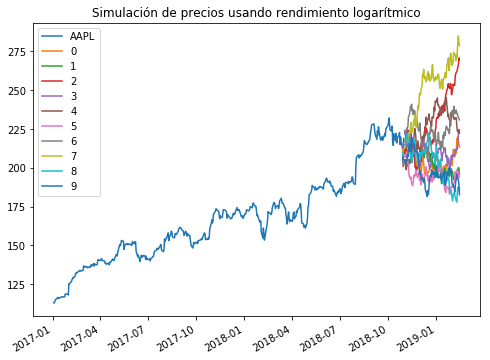

In [23]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)
# sim_ret_ri
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');
S_T-S_T2

In [24]:
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son iguales


(0.013555054847592646, 0.013537847782589606)

## 2. Valuación usando simulación: modelo normal para los rendimientos

- Hallar media y desviación estándar muestral de los rendimientos logarítmicos

In [25]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0013121468005006648, 0.013537847782589606)

No se toma la media sino la tasa libre de riesgo
> Referencia: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [26]:
# Tasa de bonos de 1 yr de fecha 10/01/18 -> 2.60%
r = 0.0260/360 # Tasa diaria

- Simularemos el tiempo de contrato (días=109) desde 29/10/18 hasta 15/02/19, 10 escenarios:
> Calculador de fechas: https://es.calcuworld.com/calendarios/calculadora-de-tiempo-entre-dos-fechas/
    
    - Generar fechas

In [27]:
ndays = 109
nscen = 10
dates = pd.date_range('2018-10-29', periods = ndays)
dates

DatetimeIndex(['2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05',
               '2018-11-06', '2018-11-07',
               ...
               '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
               '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14'],
              dtype='datetime64[ns]', length=109, freq='D')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe

In [28]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2018-10-29,0.015,-0.026,0.005,...,0.024,1.433e-02,-0.003
2018-10-30,0.024,-0.003,0.012,...,0.033,4.170e-03,-0.005
2018-10-31,0.018,-0.006,0.014,...,0.030,-1.983e-04,-0.008
2018-11-01,0.018,-0.004,0.019,...,0.027,4.645e-03,-0.010
2018-11-02,0.013,-0.016,0.040,...,0.011,3.129e-03,0.013
...,...,...,...,...,...,...,...
2019-02-10,0.285,-0.025,0.168,...,-0.052,2.384e-01,-0.112
2019-02-11,0.260,-0.045,0.158,...,-0.062,2.351e-01,-0.130
2019-02-12,0.228,-0.048,0.157,...,-0.064,2.276e-01,-0.145
2019-02-13,0.253,-0.054,0.166,...,-0.054,2.129e-01,-0.167


- Con los rendimientos simulados, calcular los escenarios de precios respectivos:

In [29]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2018-10-29,210.524,202.242,208.458,...,212.608,210.475,206.868
2018-10-30,212.476,206.927,210.069,...,214.374,208.347,206.461
2018-10-31,211.346,206.220,210.335,...,213.778,207.439,205.898
2018-11-01,211.185,206.598,211.479,...,213.165,208.446,205.376
2018-11-02,210.112,204.128,215.930,...,209.844,208.130,210.106
...,...,...,...,...,...,...,...
2019-02-10,275.869,202.277,245.442,...,196.880,263.340,185.434
2019-02-11,269.206,198.434,242.936,...,195.038,262.482,182.125
2019-02-12,260.715,197.746,242.781,...,194.604,260.500,179.489
2019-02-13,267.307,196.493,244.900,...,196.658,256.704,175.544


- Graficar:

In [30]:
#sim_closes.plot(figsize=(8,6));

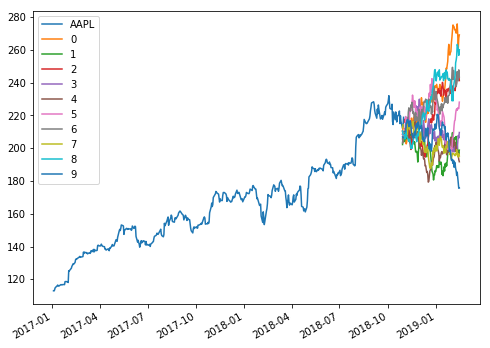

In [31]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [32]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL190118C00225000',
 'strike': 225.0,
 'currency': 'USD',
 'lastPrice': 3.8,
 'change': -6.91,
 'percentChange': -64.519135,
 'volume': 6441,
 'openInterest': 23183,
 'bid': 3.6,
 'ask': 4.3,
 'contractSize': 'REGULAR',
 'expiration': 1547769600,
 'lastTradeDate': 1541188799,
 'impliedVolatility': 0.2788158056640625,
 'inTheMoney': False}

In [33]:
K=200  # strike price
ndays = 109 
nscen = 100000
dates = pd.date_range('2018-10-29', periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

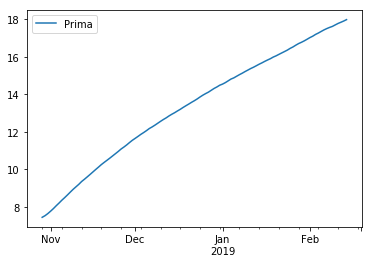

In [34]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot();

La valuación de la opción es:

In [35]:
call.iloc[-1]

Prima    17.968
Name: 2019-02-14 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [36]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(17.723280160955735, 18.21276540326986)
(17.723280160955735, 18.21276540326986)


### Análisis de la distribución de los rendimientos

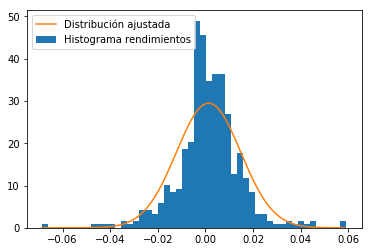

In [37]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


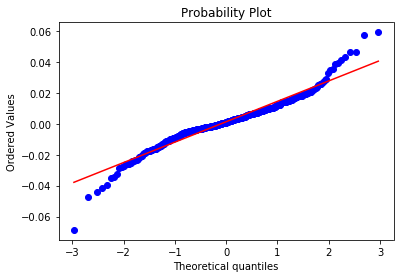

In [38]:
st.probplot(ren['AAPL'], dist='norm', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

- Primero, cantidad de días y número de escenarios de simulación

In [39]:
ndays = 109 
nscen = 10

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [40]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [41]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2018-10-29,-7.276e-03,0.011,-0.007,...,0.016,3.933e-04,5.506e-03
2018-10-30,2.950e-03,-0.010,-0.025,...,0.003,2.950e-03,1.062e-02
2018-10-31,3.933e-04,0.008,0.008,...,0.008,2.085e-02,3.933e-04
2018-11-01,3.933e-04,-0.002,0.016,...,-0.007,1.062e-02,-7.276e-03
2018-11-02,3.933e-04,0.011,0.006,...,-0.002,1.062e-02,1.829e-02
...,...,...,...,...,...,...,...
2019-02-10,3.933e-04,0.003,0.003,...,0.003,8.063e-03,1.062e-02
2019-02-11,-1.495e-02,0.003,-0.010,...,0.018,5.506e-03,1.573e-02
2019-02-12,-2.163e-03,-0.002,-0.005,...,0.011,-9.833e-03,8.063e-03
2019-02-13,3.618e-02,0.008,0.021,...,0.008,3.933e-04,-2.163e-03


In [42]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2018-10-29,205.976,209.695,205.976,...,210.770,207.562,208.626
2018-10-30,206.584,207.643,200.856,...,211.393,208.175,210.853
2018-10-31,206.666,209.324,202.482,...,213.104,212.560,210.936
2018-11-01,206.747,208.872,205.692,...,211.559,214.829,209.407
2018-11-02,206.828,211.102,206.828,...,211.102,217.123,213.272
...,...,...,...,...,...,...,...
2019-02-10,298.407,255.318,268.712,...,272.866,279.932,237.074
2019-02-11,293.980,256.072,266.083,...,277.902,281.477,240.833
2019-02-12,293.345,255.519,264.830,...,280.869,278.723,242.783
2019-02-13,304.154,257.588,270.409,...,283.143,278.833,242.258


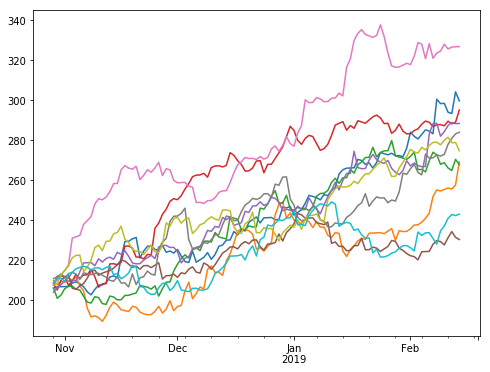

In [44]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5,1,'Simulación usando el histograma de los rendimientos')

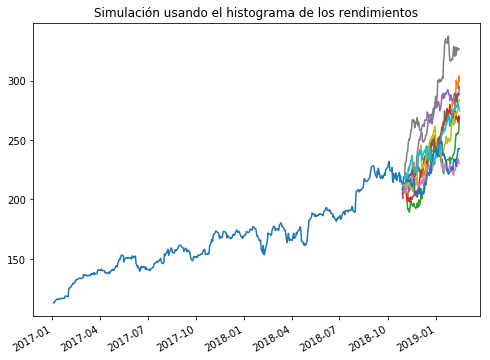

In [45]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [46]:
K=200
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

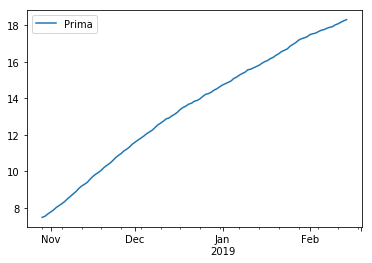

In [47]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();
#aqui es donde se le mete la ecacion BS call= st-k

In [48]:
call_hist.iloc[-1]

Prima    18.3
Name: 2019-02-14 00:00:00, dtype: float64

In [49]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL190118C00225000',
 'strike': 225.0,
 'currency': 'USD',
 'lastPrice': 3.8,
 'change': -6.91,
 'percentChange': -64.519135,
 'volume': 6441,
 'openInterest': 23183,
 'bid': 3.6,
 'ask': 4.3,
 'contractSize': 'REGULAR',
 'expiration': 1547769600,
 'lastTradeDate': 1541188799,
 'impliedVolatility': 0.2788158056640625,
 'inTheMoney': False}

Intervalo de confianza del 95%

In [50]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(17.706199329229563, 18.89294323033416)
(17.706199329229563, 18.89294323033416)


# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modify by Oscar Jaramillo Z.
</footer>